# PwC: Task 2 - Responsible AI
## Banking Marketing

### Here is the background information on your task
Responsible AI is top of mind for business leaders, along with an urgent need to understand the decision process behind these algorithms. With great potential comes great risk. Not being able to understand an AI system can lead to a “black box” effect, which limits an organisation’s ability to explain and defend business-critical decisions. 

PwC’s Responsible AI approach can help. We provide services to help explain both overall decision-making and also individual choices and predictions, tailored to the perspectives of different stakeholders.

Jakob, your team manager, is keen to meet you. Ready to hit the road? Our first stop is Geneva. Here’s an overview of the project and what I need you to do.

A large bank has asked us to evaluate the marketing algorithms they use for retail banking. Their sophisticated phone marketing algorithm predicts whether a certain person will subscribe to a term deposit or not. Based on that assessment, the bank then optimises its phone calling strategy. With this algorithm, the bank has been successful in predicting which clients are more likely to subscribe to their term deposits. 

Management is now interested in finding out how a classification model can lead to certain decision-making processes. 

### Here is your task

Create a classification model in Python. Feel free to use libraries such as SkLearn, Keras/Tensorflow or Pytorch. 
Analyse the model and provide insight into which features/variables influence the outcome of the classification the most: on a global level, and specifically for observation #4 and #20
Develop some form of plot or graph with brief comments on your observations. 


In [48]:
# Import Packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, average_precision_score, f1_score,precision_score, recall_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn import tree
import graphviz

# Read file
df = pd.read_csv("Dataset/bank-additional-full.csv", sep = ';')

### Exploratory Data Analysis & Cleaning Data

In [49]:
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [50]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [51]:
df.shape


(41188, 21)

In [52]:
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [53]:
df.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [54]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [55]:
df.duplicated().sum()


12

In [56]:
df = df.drop_duplicates()
df.shape


(41176, 21)

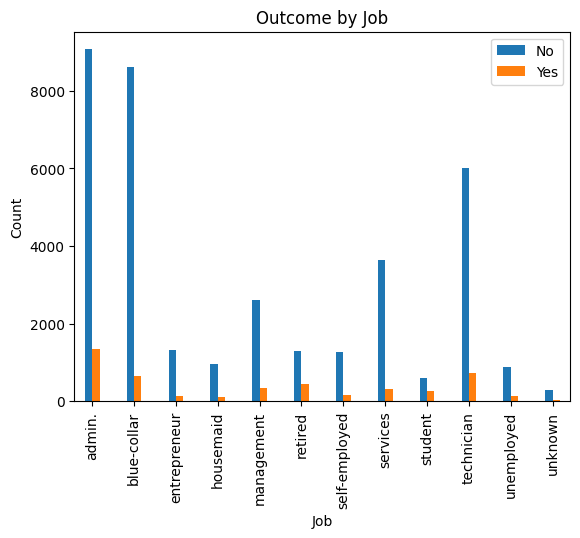

In [57]:
# Group the data by job and outcome, and count the occurrences
grouped = df.groupby(['job', 'y']).size().unstack(fill_value=0)

# Create the bar plot
ax = grouped.plot(kind='bar', width=0.35)

# Set labels and title
ax.set_xlabel('Job')
ax.set_ylabel('Count')
ax.set_title('Outcome by Job')

# Set the legend
ax.legend(["No", "Yes"], loc="upper right")

# Show the plot
plt.show()

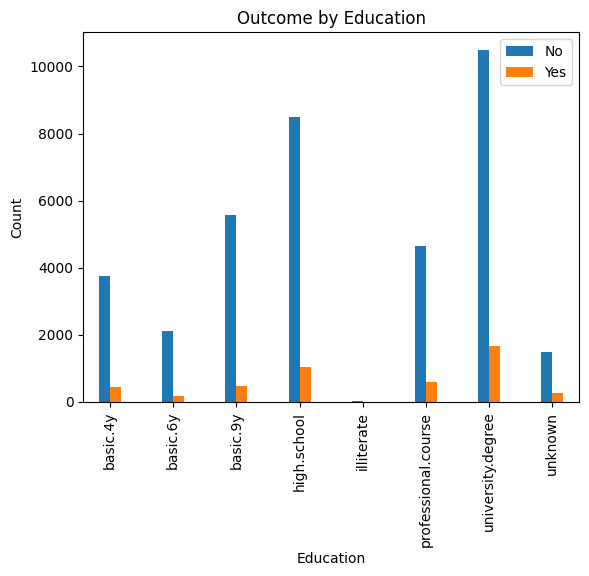

In [58]:
# Group the data by job and outcome, and count the occurrences
grouped = df.groupby(['education', 'y']).size().unstack(fill_value=0)

# Create the bar plot
ax = grouped.plot(kind='bar', width=0.35)

# Set labels and title
ax.set_xlabel('Education')
ax.set_ylabel('Count')
ax.set_title('Outcome by Education')

# Set the legend
ax.legend(["No", "Yes"], loc="upper right")

# Show the plot
plt.show()

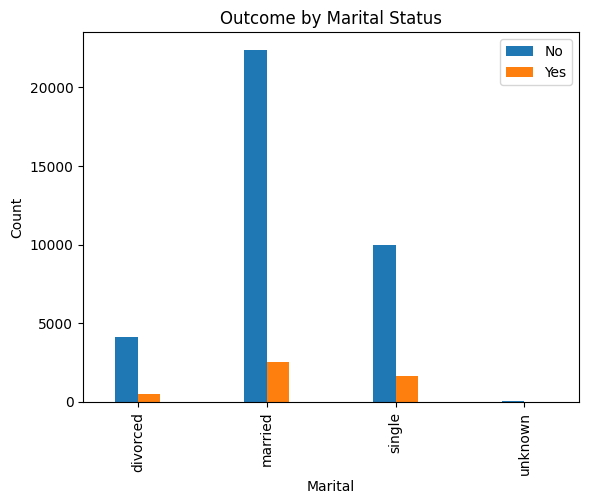

In [59]:
# Group the data by job and outcome, and count the occurrences
grouped = df.groupby(['marital', 'y']).size().unstack(fill_value=0)

# Create the bar plot
ax = grouped.plot(kind='bar', width=0.35)

# Set labels and title
ax.set_xlabel('Marital')
ax.set_ylabel('Count')
ax.set_title('Outcome by Marital Status')

# Set the legend
ax.legend(["No", "Yes"], loc="upper right")

# Show the plot
plt.show()

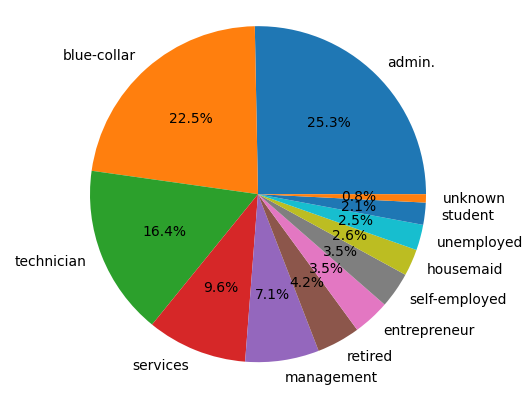

In [60]:
# Count the occurrences of each job type
job_counts = df['job'].value_counts()

# Plotting the pie chart
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

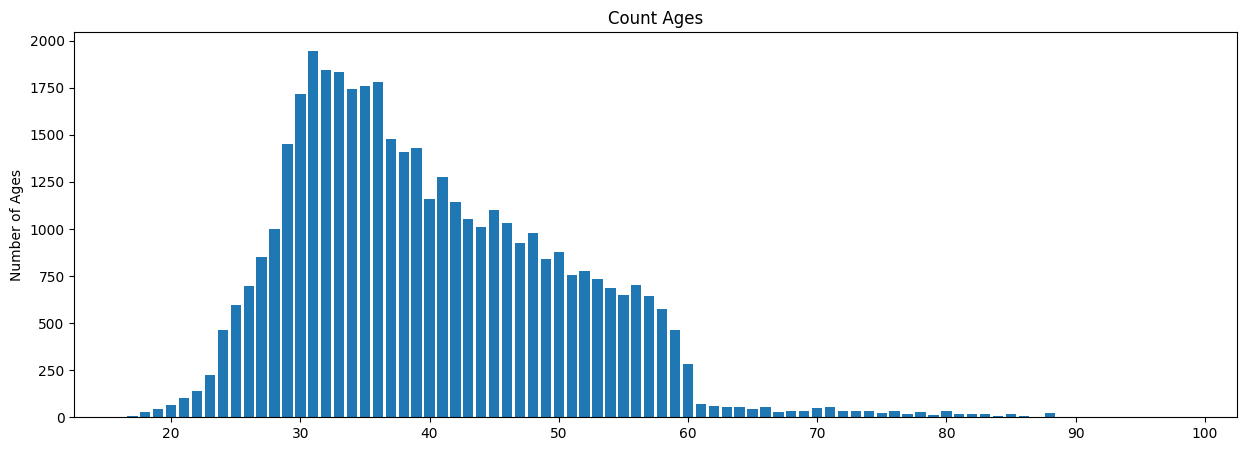

In [61]:
freq_table_age = df.groupby(['age']).size().reset_index(name = 'count')
freq_table_age

# Set figure size
plt.rcParams["figure.figsize"] = [15,5]
# Create Bar plot
plt.bar(freq_table_age['age'], freq_table_age['count'])
# Set lable for y - axis
plt.ylabel("Number of Ages")
# Set title
plt.title('Count Ages')
# Display
plt.show()

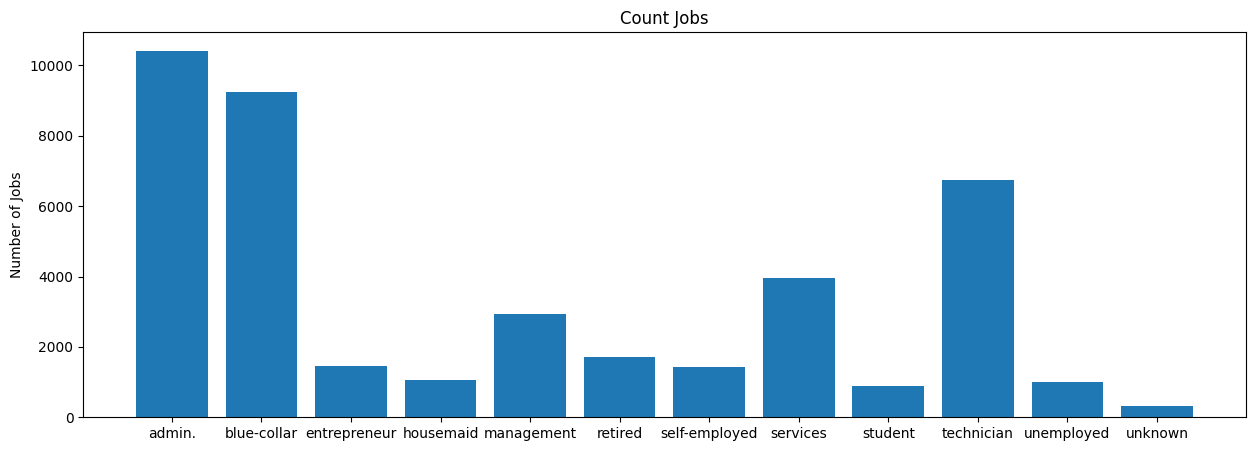

In [62]:
freq_table_age = df.groupby(['job']).size().reset_index(name = 'count')
freq_table_age

# Set figure size
plt.rcParams["figure.figsize"] = [15,5]
# Create Bar plot
plt.bar(freq_table_age['job'], freq_table_age['count'])
# Set lable for y - axis
plt.ylabel("Number of Jobs")
# Set title
plt.title('Count Jobs')
# Display
plt.show()

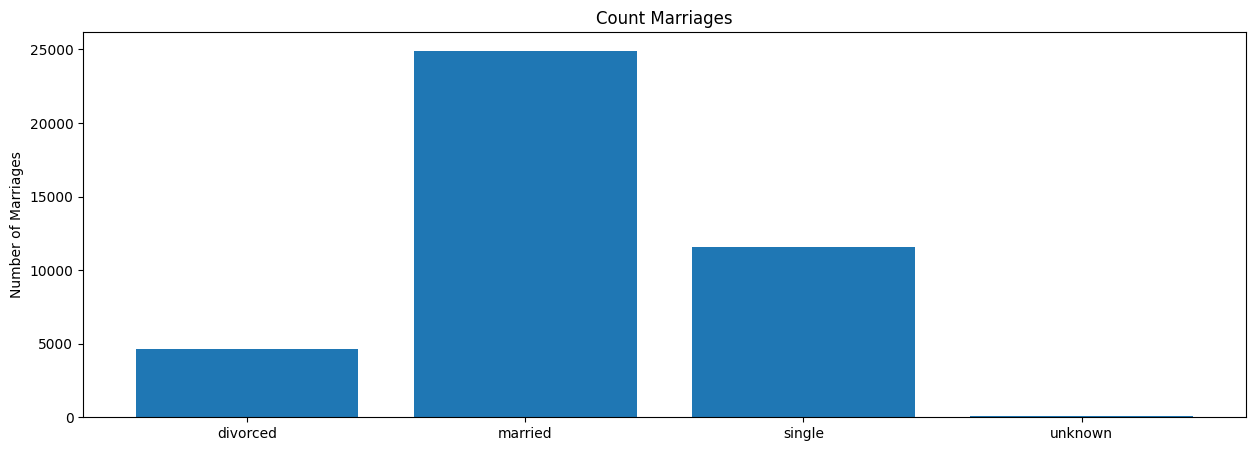

In [63]:
freq_table_age = df.groupby(['marital']).size().reset_index(name = 'count')
freq_table_age

# Set figure size
plt.rcParams["figure.figsize"] = [15,5]
# Create Bar plot
plt.bar(freq_table_age['marital'], freq_table_age['count'])
# Set lable for y - axis
plt.ylabel("Number of Marriages")
# Set title
plt.title('Count Marriages')
# Display
plt.show()

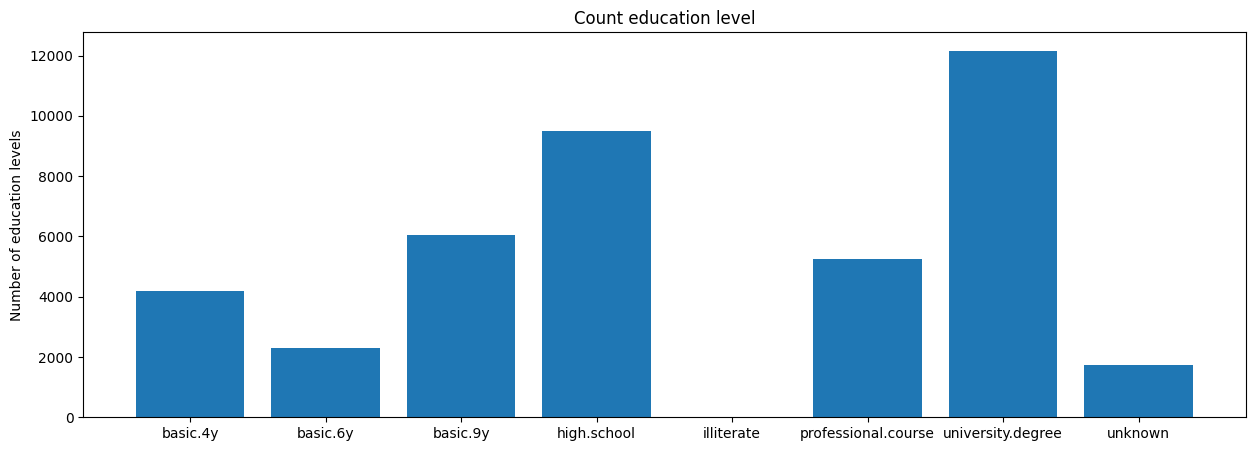

In [64]:
freq_table_age = df.groupby(['education']).size().reset_index(name = 'count')
freq_table_age

# Set figure size
plt.rcParams["figure.figsize"] = [15,5]
# Create Bar plot
plt.bar(freq_table_age['education'], freq_table_age['count'])
# Set lable for y - axis
plt.ylabel("Number of education levels")
# Set title
plt.title('Count education level')
# Display
plt.show()

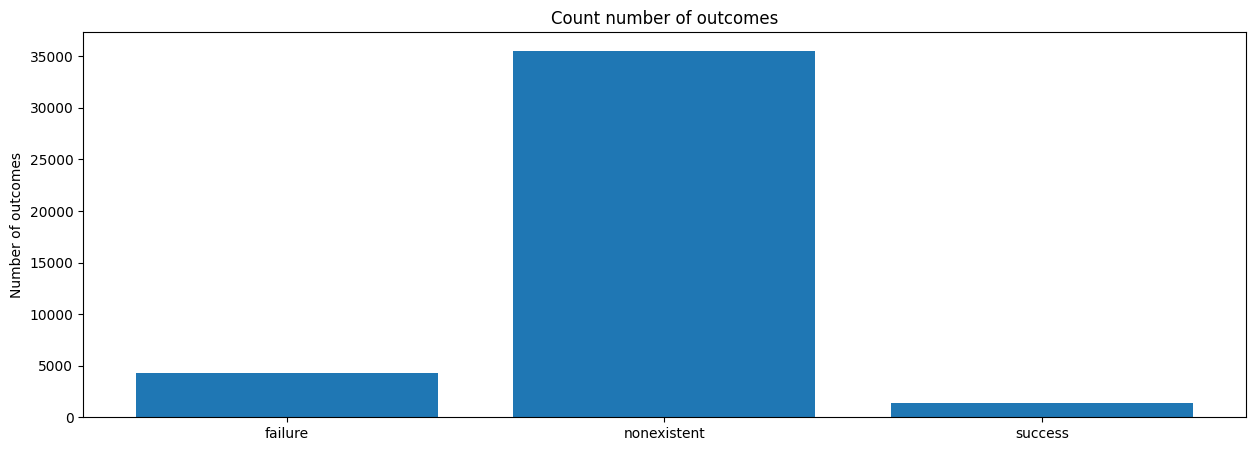

In [65]:
freq_table_age = df.groupby(['poutcome']).size().reset_index(name = 'count')
freq_table_age

# Set figure size
plt.rcParams["figure.figsize"] = [15,5]
# Create Bar plot
plt.bar(freq_table_age['poutcome'], freq_table_age['count'])
# Set lable for y - axis
plt.ylabel("Number of outcomes")
# Set title
plt.title('Count number of outcomes')
# Display
plt.show()

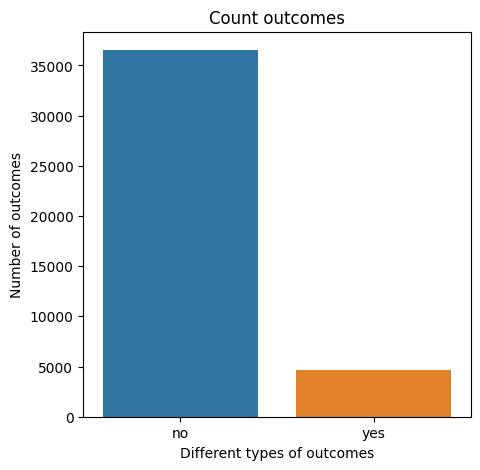

In [66]:
freq_table_y = df.groupby(['y']).size().reset_index(name = 'count')
freq_table_y

# Set figure size
plt.figure(figsize = (5,5))
# Create Bar plot
sns.barplot(x = 'y', y = 'count', data = freq_table_y)
# Set label for y - axis
plt.ylabel("Number of outcomes")
# Set label for x - axis
plt.xlabel("Different types of outcomes")
# Set title
plt.title('Count outcomes')
# Display
plt.show()

<Axes: >

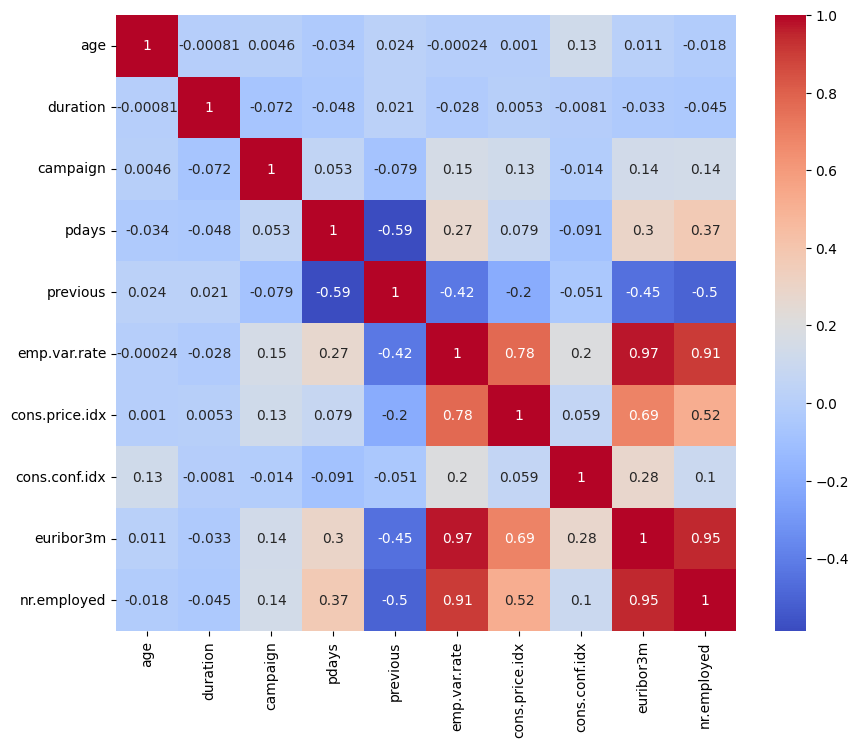

In [67]:
# Select only the numeric columns
numeric_data = df.select_dtypes(include=np.number)

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()
# Set the figure size
plt.figure(figsize=(10, 8))
# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

### Create and evaluate classification model

In [68]:
X_Inp = pd.get_dummies(df.drop('y', axis = 1), drop_first = 'true')

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_Inp, df['y'], test_size=0.2, random_state=42)

In [70]:
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [71]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [72]:
predictions = model.predict(X_test)

In [73]:
# Convert 'no' and 'yes' labels to 0 and 1
y_test_binary = np.where(y_test == 'no', 0, 1)
predictions_binary = np.where(predictions == 'no', 0, 1)

# Calculate accuracy score
accuracy = accuracy_score(y_test_binary, predictions_binary)

# Calculate precision, recall, and F1 score using the updated labels
print(classification_report(y_test_binary, predictions_binary))

# Calculate precision
precision = precision_score(y_test_binary, predictions_binary)

# Calculate recall
recall = recall_score(y_test_binary, predictions_binary)

# Calculate F1 score
f1 = f1_score(y_test_binary, predictions_binary)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7265
           1       0.66      0.46      0.55       971

    accuracy                           0.91      8236
   macro avg       0.80      0.72      0.75      8236
weighted avg       0.90      0.91      0.90      8236

Accuracy: 0.9090577950461389
Precision: 0.663235294117647
Recall: 0.46446961894953653
F1-score: 0.5463355542095698


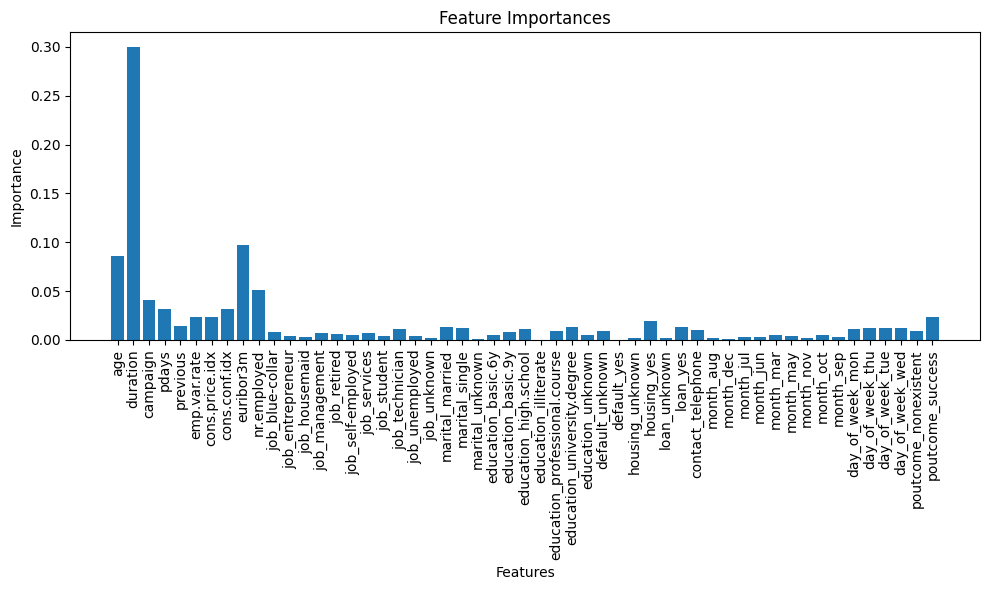

In [74]:
# Obtain feature importances
feature_importance = model.feature_importances_

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance)), feature_names, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

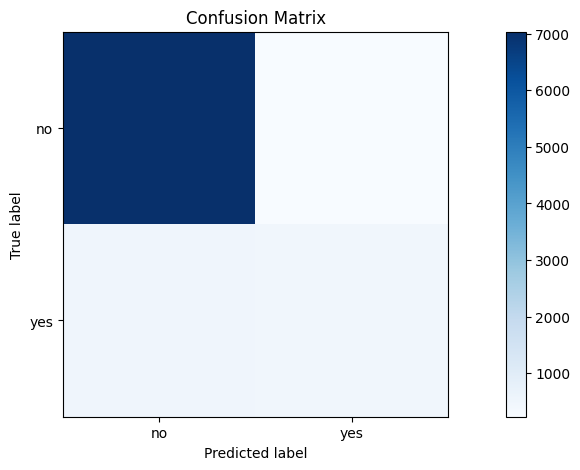

In [75]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
classes = np.unique(y_test)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       xlabel='Predicted label',
       ylabel='True label',
       title='Confusion Matrix')
plt.show()